In [1]:
# prompt: healthcare data exploration

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    df = pd.read_csv('/content/healthcare_data (1).csv')
except FileNotFoundError:
    print("Error: '/content/healthcare_data (1).csv' not found. Please upload the file or provide the correct path.")
    exit()

In [3]:
# 1. Data Overview
print(df.head())
print(df.info())
print(df.describe())

   PatientID  Age  BloodPressure  SugarLevel      Weight
0          1   44            118   87.892495  105.568034
1          2   39            109  177.321803  105.703426
2          3   49            149  144.148273   77.787070
3          4   58            121   90.355404  115.244784
4          5   35            109  126.421800   70.383790
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      20 non-null     int64  
 1   Age            20 non-null     int64  
 2   BloodPressure  20 non-null     int64  
 3   SugarLevel     20 non-null     float64
 4   Weight         20 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 932.0 bytes
None
       PatientID        Age  BloodPressure  SugarLevel      Weight
count   20.00000  20.000000      20.000000   20.000000   20.000000
mean    10.50000  47.500000     128.650000  139.412236

In [4]:
# 2. Missing Values
print(df.isnull().sum())

PatientID        0
Age              0
BloodPressure    0
SugarLevel       0
Weight           0
dtype: int64


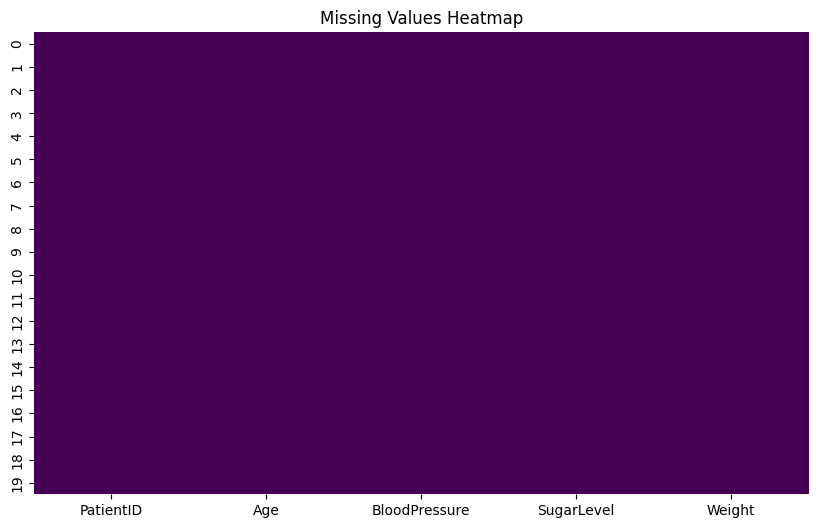

In [5]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [6]:
# Handle missing values (example: fill with mean for numerical columns)

for col in df.select_dtypes(include=['number']).columns:
    if df[col].isnull().any():
      df[col] = df[col].fillna(df[col].mean())

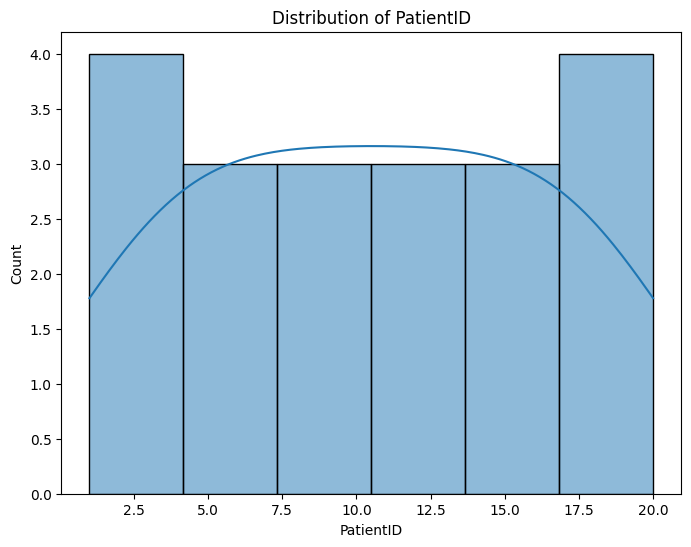

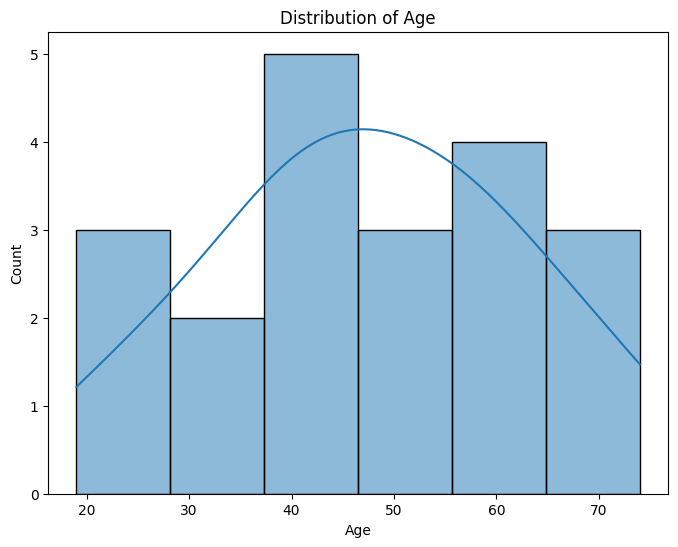

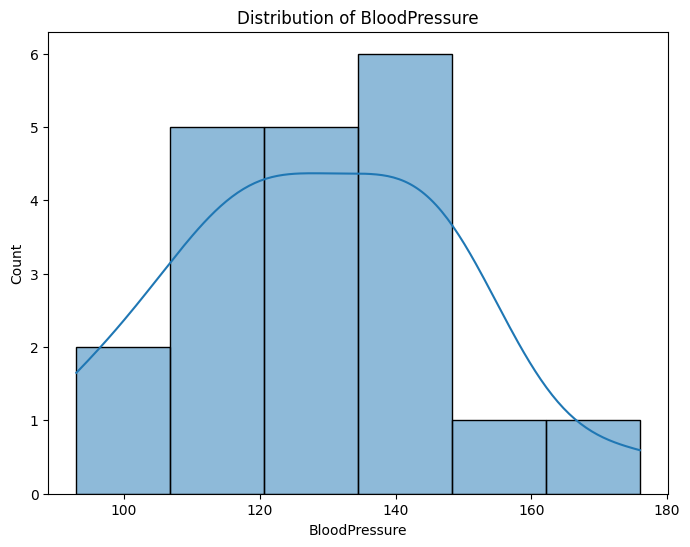

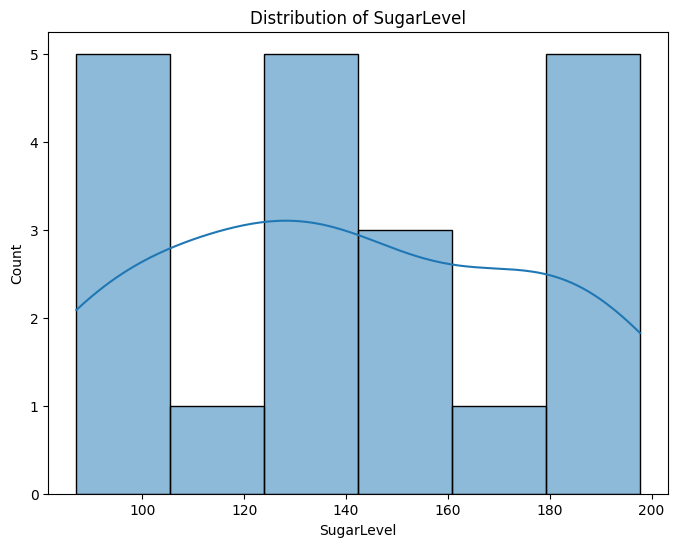

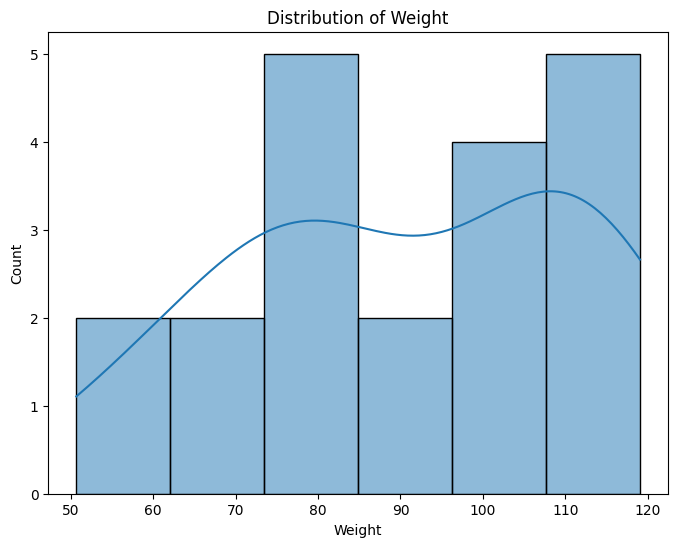

In [7]:
# 3. Data Distribution
# Numerical features
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [8]:
# Categorical features
for col in df.select_dtypes(include=['object', 'category']).columns:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=col, data=df)
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
  plt.show()

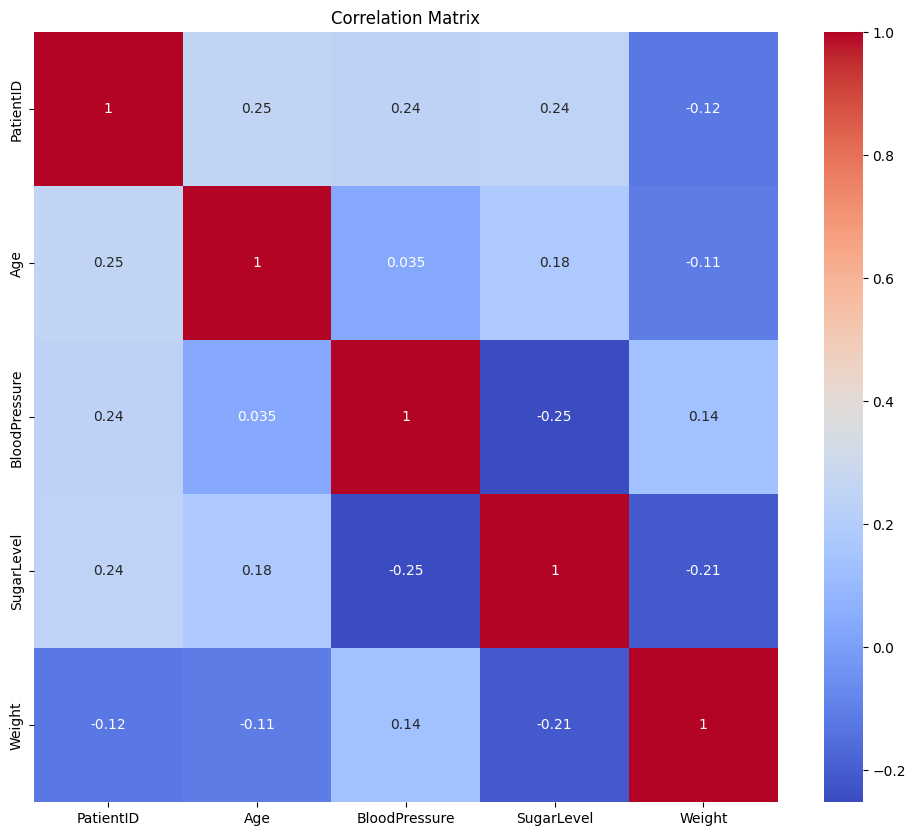

In [9]:
# 4. Correlation Analysis (for numerical features)
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()